<a href="https://githubtocolab.com/gee-community/geemap/blob/master/docs/notebooks/51_cartoee_projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) if needed. Keep in mind that cartopy can be challenging to install. If you are unable to install cartopy on your computer, you can try Google Colab with this the [notebook example](https://colab.research.google.com/github/gee-community/geemap/blob/master/docs/notebooks/cartoee_colab.ipynb). 

See below the commands to install cartopy and geemap using conda/mamba:

```
conda create -n carto python=3.8
conda activate carto
conda install mamba -c conda-forge
mamba install cartopy scipy -c conda-forge
mamba install geemap -c conda-forge
jupyter notebook
```

In [ ]:
# !pip install cartopy scipy
# !pip install geemap

# Working with projections in cartoee

`cartoee` is a lightweight module to aid in creatig publication quality maps from Earth Engine processing results without having to download data. The `cartoee` package does this by requesting png images from EE results (which are usually good enough for visualization) and `cartopy` is used to create the plots. Utility functions are available to create plot aethetics such as gridlines or color bars. **The notebook and the geemap cartoee module ([cartoee.py](https://geemap.org/cartoee)) were contributed by [Kel Markert](https://github.com/KMarkert). A huge thank you to him.**

In [1]:
import ee
import geemap
from geemap import cartoee
import cartopy.crs as ccrs

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
geemap.ee_initialize()

## Plotting an image on a map

Here we are going to show another example of creating a map with EE results. We will use global sea surface temperature data for Jan-Mar 2018.

In [4]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection("NASA/OCEANDATA/MODIS-Terra/L3SMI")
    .filter(ee.Filter.date("2018-01-01", "2018-03-01"))
    .median()
    .select(["sst"], ["SST"])
)

In [5]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {"bands": "SST", "min": -2, "max": 30}
# specify region to focus on
bbox = [180, -88, -180, 88]

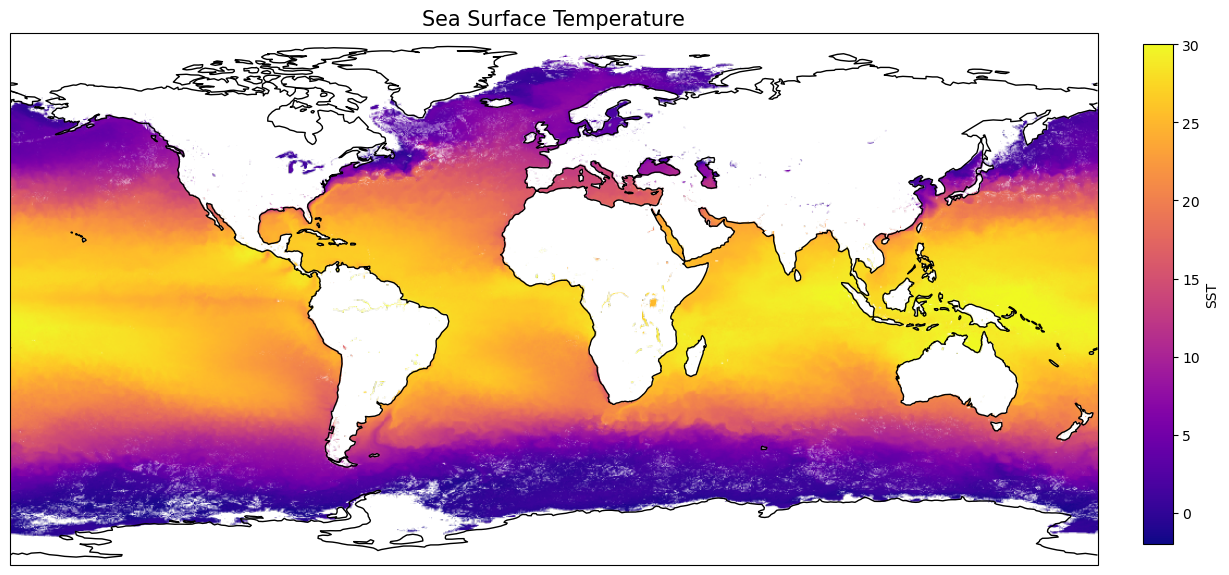

In [6]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ocean, cmap="plasma", vis_params=visualization, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc="right", cmap="plasma")

ax.set_title(label="Sea Surface Temperature", fontsize=15)

ax.coastlines()
plt.show()

### Mapping with different projections

You can specify what ever projection is available within `cartopy` to display the results from Earth Engine. Here are a couple examples of global and regions maps using the sea surface temperature example. Please refer to the [`cartopy` projection documentation](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) for more examples with different projections.

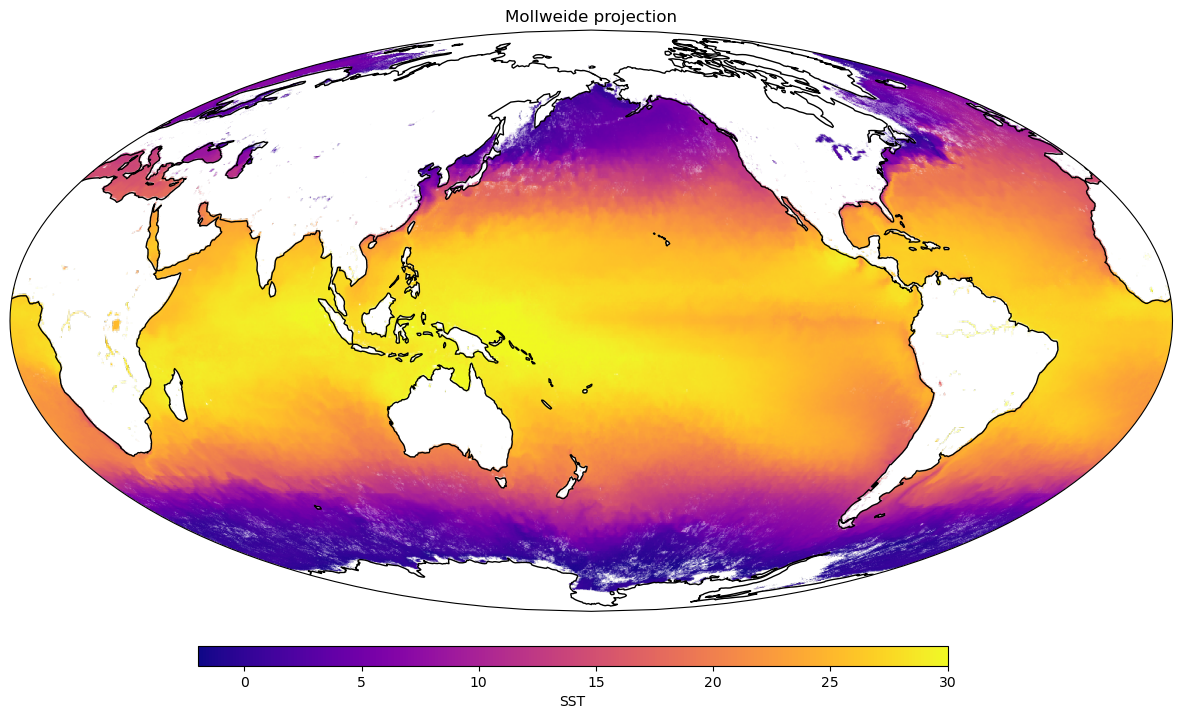

In [7]:
fig = plt.figure(figsize=(15, 10))

# create a new Mollweide projection centered on the Pacific
projection = ccrs.Mollweide(central_longitude=-180)

# plot the result with cartoee using the Mollweide projection
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap="plasma", proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc="bottom", cmap="plasma", orientation="horizontal"
)

ax.set_title("Mollweide projection")

ax.coastlines()
plt.show()

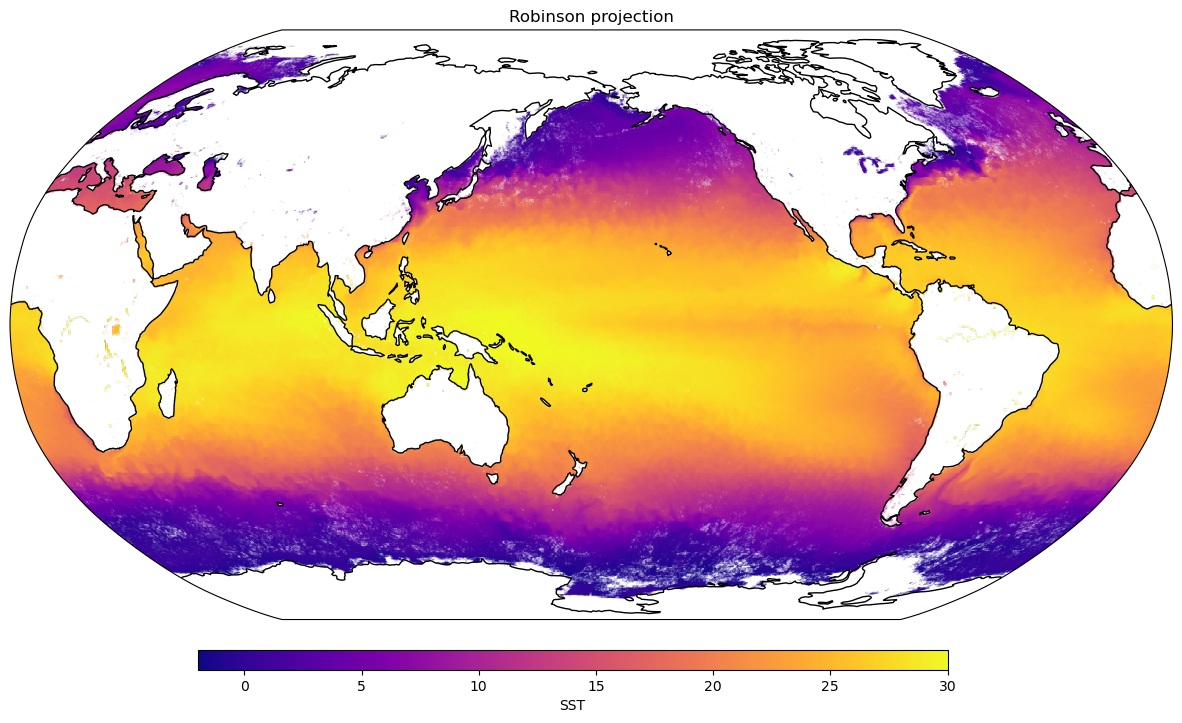

In [8]:
fig = plt.figure(figsize=(15, 10))

# create a new Goode homolosine projection centered on the Pacific
projection = ccrs.Robinson(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap="plasma", proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc="bottom", cmap="plasma", orientation="horizontal"
)

ax.set_title("Robinson projection")

ax.coastlines()
plt.show()

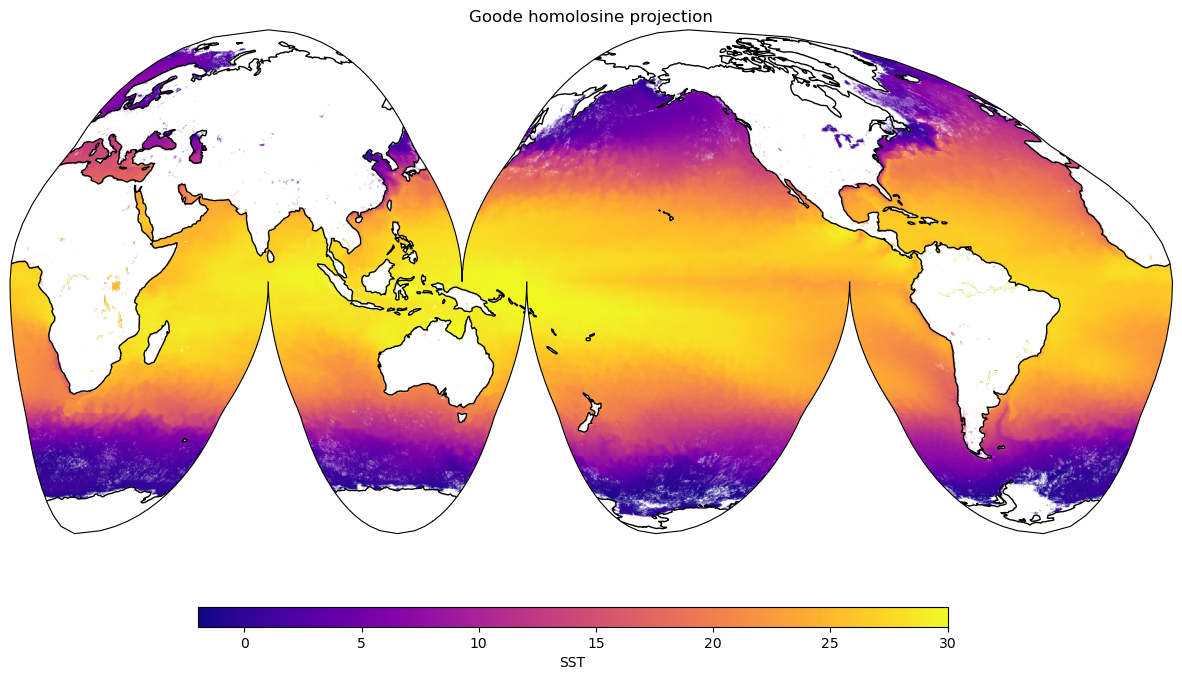

In [9]:
fig = plt.figure(figsize=(15, 10))

# create a new Goode homolosine projection centered on the Pacific
projection = ccrs.InterruptedGoodeHomolosine(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap="plasma", proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc="bottom", cmap="plasma", orientation="horizontal"
)

ax.set_title("Goode homolosine projection")

ax.coastlines()
plt.show()

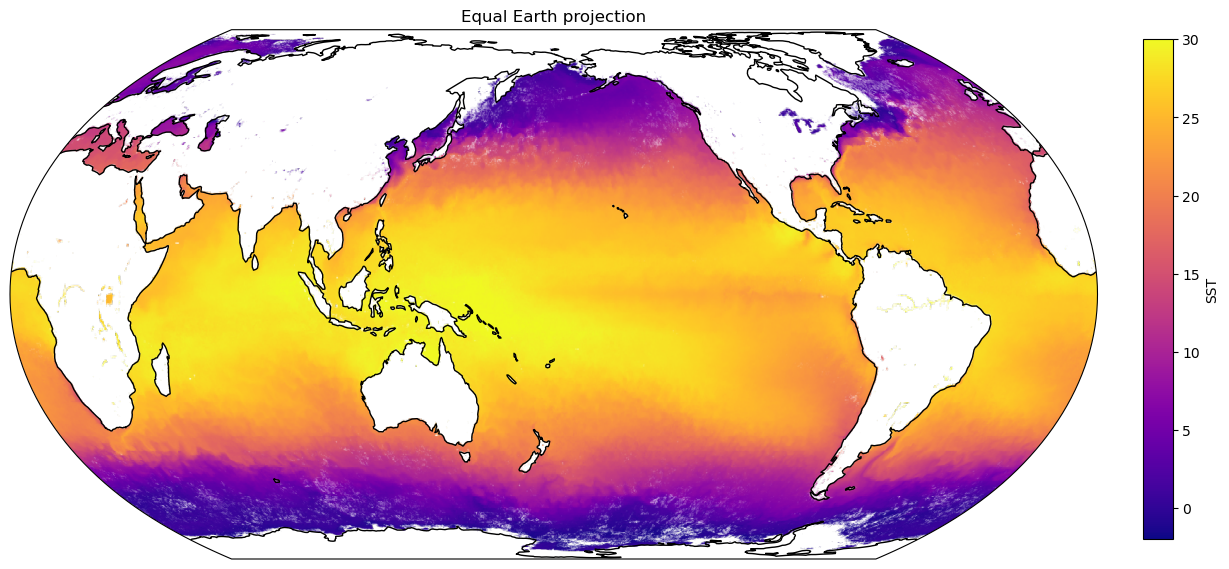

In [10]:
fig = plt.figure(figsize=(15, 10))

# create a new orographic projection focused on the Pacific
projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap="plasma", proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc="right", cmap="plasma", orientation="vertical"
)

ax.set_title("Equal Earth projection")

ax.coastlines()
plt.show()

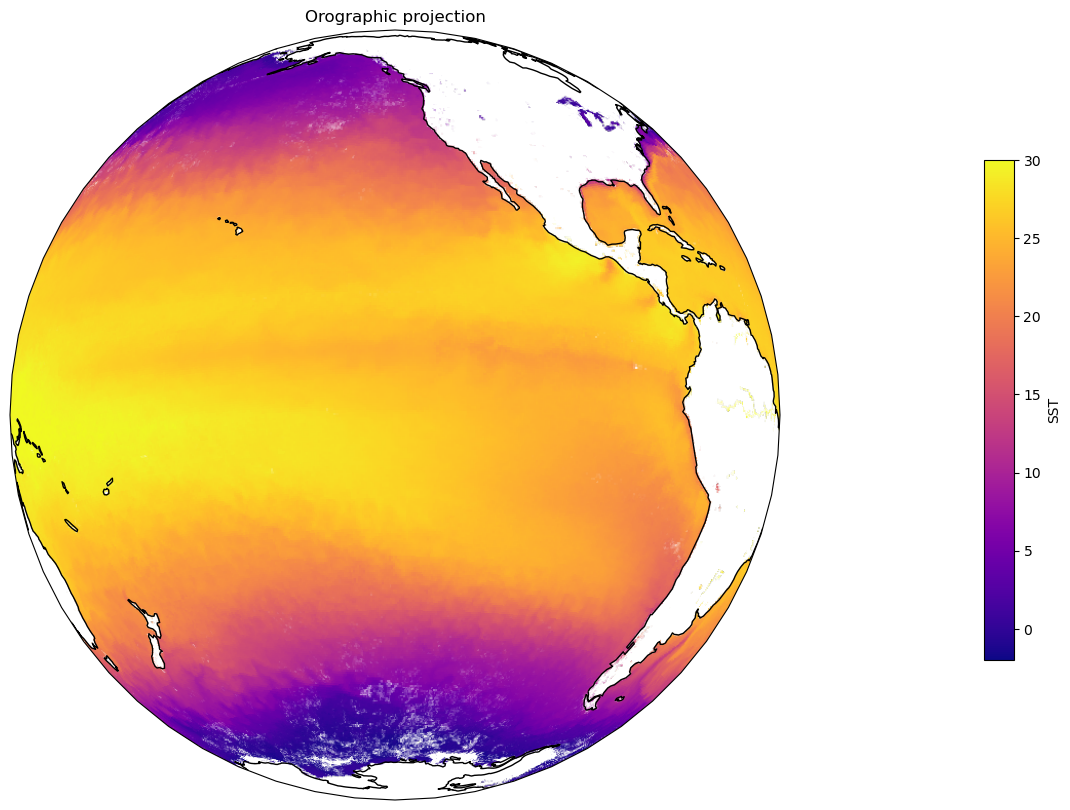

In [11]:
fig = plt.figure(figsize=(15, 10))

# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(-130, -10)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap="plasma", proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc="right", cmap="plasma", orientation="vertical"
)

ax.set_title("Orographic projection")

ax.coastlines()
plt.show()

### Warping artifacts

Often times global projections are not needed so we use specific projection for the map that provides the best view for the geographic region of interest. When we use these, sometimes image warping effects occur. This is because `cartoee` only requests data for region of interest and when mapping with `cartopy` the pixels get warped to fit the view extent as best as possible. Consider the following example where we want to map SST over the south pole:

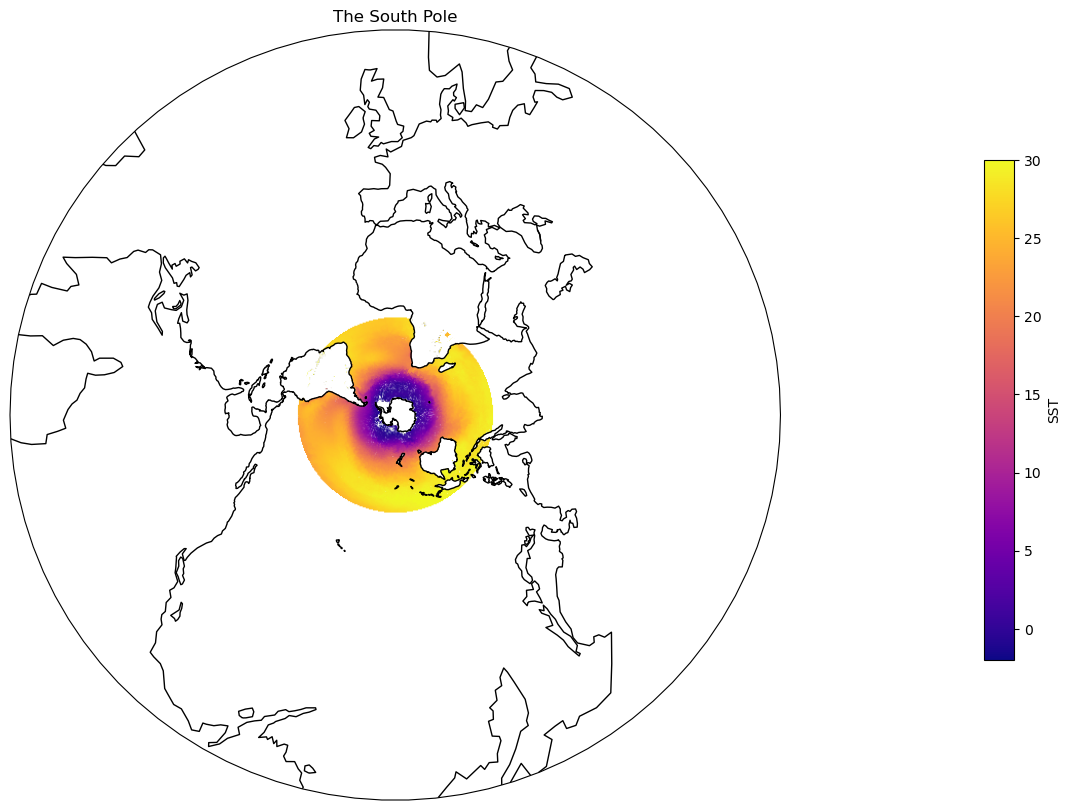

In [12]:
fig = plt.figure(figsize=(15, 10))

# Create a new region to focus on
spole = [180, -88, -180, 0]

projection = ccrs.SouthPolarStereo()

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(
    ocean, cmap="plasma", vis_params=visualization, region=spole, proj=projection
)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc="right", cmap="plasma")

ax.coastlines()
ax.set_title("The South Pole")
plt.show()

As you can see from the result there are warping effects on the plotted image. There is really no way of getting around this (other than requesting a larger extent of data which may not always be the case). 

So, what we can do is set the extent of the map to a more realistic view after plotting the image as in the following example:

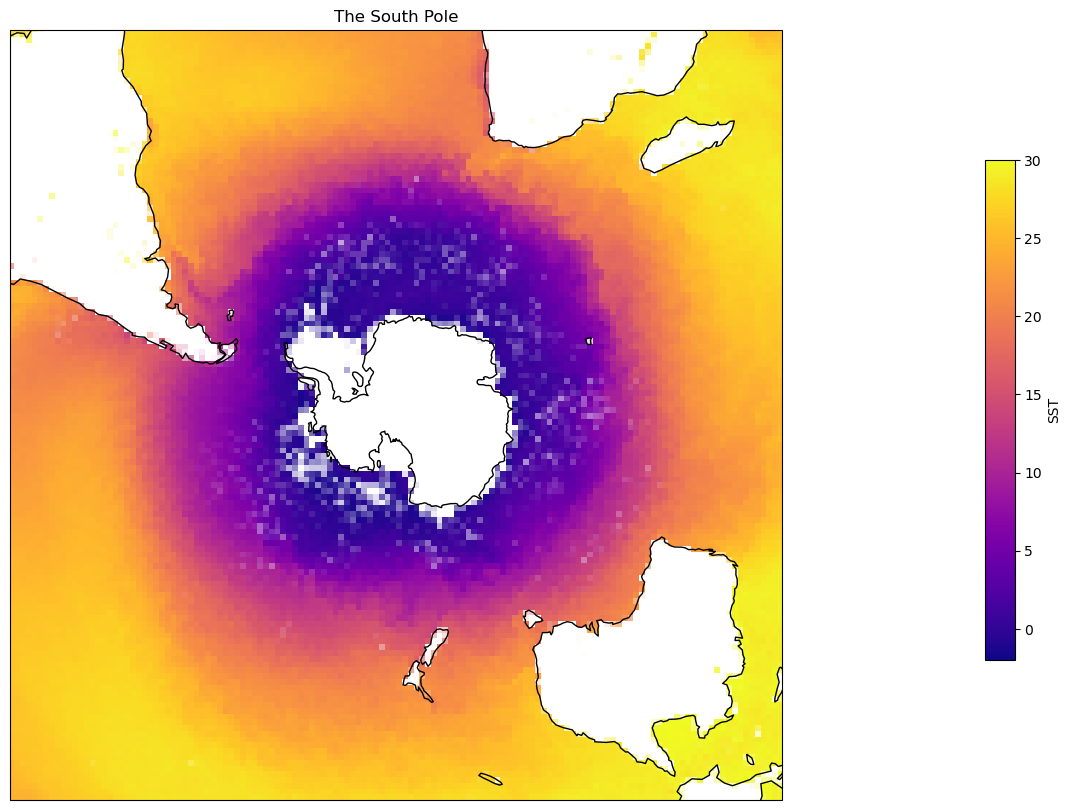

In [13]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(
    ocean, cmap="plasma", vis_params=visualization, region=spole, proj=projection
)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc="right", cmap="plasma")

ax.coastlines()
ax.set_title("The South Pole")

# get bounding box coordinates of a zoom area
zoom = spole
zoom[-1] = -20

# convert bbox coordinate from [W,S,E,N] to [W,E,S,N] as matplotlib expects
zoom_extent = cartoee.bbox_to_extent(zoom)

# set the extent of the map to the zoom area
ax.set_extent(zoom_extent, ccrs.PlateCarree())

plt.show()